<h2>Hands-on 4: Logistic Regression Notebook (Tutorial)</h2>



---



<h3>1. Fundamentos de la técnica.</h3>

**¿Qué es?**

La regresión logística es un algoritmo de aprendizaje automático supervisado utilizado para problemas de clasificación. Este algoritmo predice la probabilidad de que una entrada pertenezca a una clase específica.

**¿Cómo funciona?**

El modelo de regresión logística transforma la función de regresión lineal de salida continua en valor categórico usando una función sigmoide que mapea cualquier conjunto real de variables independientes de entrada en un valor entre 0 y 1. Esta función se conoce como función logística.




---



<h3>2. Modelo matemático.</h3>


La parte más importante de la regresión logística es la Función Sigmoide. Esta función toma cualquier valor real $z$ y lo mapea al intervalo $(0, 1)$.La fórmula de la función sigmoide es:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Donde $z$ es la combinación lineal de las variables de entrada (similar a la ecuación de la recta):

$$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$

$\sigma(z)$ es la probabilidad estimada.

$\beta_0$ es el intercepto (bias).

$\beta_n$ son los coeficientes (pesos) aprendidos por el modelo.





---



<h3>3. Descripción de las librerías.</h3>

Para la implementación de Logistic Reggression en Python se realizará con la ayuda de las siguientes librerías:

    sklearn.linear_model.LogisticRegression
Contiene la implementación del algoritmo de Regresión Logística para tareas de clasificación.

    sklearn.model_selection.train_test_split
Para dividir el conjunto de datos en conjuntos de entrenamiento y prueba.

    sklearn.metrics.confusion_matrix
Para calcular la Matriz de Confusión.

    sklearn.metrics.accuracy_score
Para calcular la Precisión (Accuracy) del modelo.

    sklearn.datasets.make_classification
Para generar un dataset sintético para el ejercicio de clasificación.

    pandas
Para la manipulación y visualización tabular de datos.

    seaborn / matplotlib
Para el análisis estadístico y la visualización de datos.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay



---



<h3>4. Pipeline.</h3>

    4.1 Preprocessing

Como primer paso generamos un dataset sintetico para posteriormente con el método **describe()** obtener y analizar las estadísticas básicas del dataset. Así mismo mediante el diagrama de despersión podemos ver claramente las dos clases que generamos, su separación y como en algunos casos se mezclan.






Estadísticas Descriptivas:

       Variable_X  Variable_Y      Target
count  200.000000  200.000000  200.000000
mean     0.127291    0.998048    0.500000
std      1.448313    1.029297    0.501255
min     -3.121909   -1.221998    0.000000
25%     -0.886754    0.353238    0.000000
50%      0.100130    0.866166    0.500000
75%      1.110329    1.679383    1.000000
max      3.663322    4.484226    1.000000




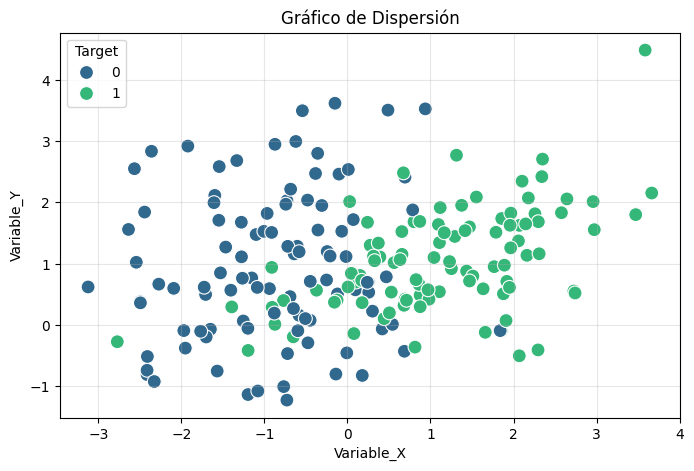

In [19]:
# Generar los datos
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Crear el DataFrame
df = pd.DataFrame(X, columns=['Variable_X', 'Variable_Y'])
df['Target'] = y

# Revisar las estadísticas
print("Estadísticas Descriptivas:\n")

print(df.describe())
print("\n")

# Gráfico de Dispersión
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Variable_X', y='Variable_Y', hue='Target', palette='viridis', s=100)
plt.title('Gráfico de Dispersión')
plt.grid(True, alpha=0.3)
plt.show()

    4.2 Prediction


In [13]:
# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Función para relaizar la predicción
def predecir_clase(patron):

    patron_array = np.array(patron).reshape(1, -1)

    # Predicción
    clase_predicha = modelo.predict(patron_array)[0]

    print(f"Entrada: {patron}")
    print(f"Predicción: Clase {clase_predicha}")
    print("\n")

# Pruebas
print("--- Pruebas realizadas ---\n")
prueba1 = [-2, -1]
predecir_clase(prueba1)

prueba2 = [2, 2]
predecir_clase(prueba2)

prueba3 = [2, -1]
predecir_clase(prueba3)


--- Pruebas realizadas ---

Entrada: [-2, -1]
Predicción: Clase 0


Entrada: [2, 2]
Predicción: Clase 1


Entrada: [2, -1]
Predicción: Clase 1




    4.3 Model Evaluation

Evaluación del Modelo:



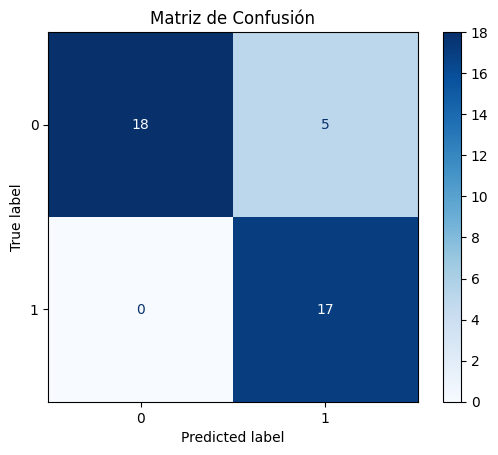


Accuracy: 0.88


In [20]:
print("Evaluación del Modelo:\n")

# Realizar predicciones con el conjunto de pruebas
y_pred = modelo.predict(X_test)

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

Finalmente, tras realizar las evaluaciones podemos ver que el modelo tuvo un buen desempeño en general. Alcanzó una precisión del 88%, lo cual es un resultado bueno sin llegar a un overfit. En cuanto a la matriz de confusión, los resultados también son buenos; podemos observar que el error se concentra en los falsos positivos.



---



<h3>5. Referecias bibliográficas</h3>

GeeksforGeeks. (2025, 18 noviembre). Logistic Regression in Machine Learning. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/understanding-logistic-regression/

LogisticRegression. (s. f.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html